   length  width  height  engine-size  horsepower  peak-rpm  city-mpg  \
0   168.8   64.1    48.8          130       111.0    5000.0        21   
1   168.8   64.1    48.8          130       111.0    5000.0        21   
2   171.2   65.5    52.4          152       154.0    5000.0        19   
3   176.6   66.2    54.3          109       102.0    5500.0        24   
4   176.6   66.4    54.3          136       115.0    5500.0        18   

   highway-mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0  
Index(['length', 'width', 'height', 'engine-size', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')
(199, 8)
(199,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146,551 (572.46 KB)

 Trainable params: 146,551 (572.46 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
37/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13703.5088 - mean_absolute_error: 13703.5088
Epoch 1: val_mean_absolute_error improved from inf to 12220.70312, saving model to mymodel.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 13706.7402 - mean_absolute_error: 13706.7402 - val_loss: 12220.7031 - val_mean_absolute_error: 12220.7031
Epoch 2/50
35/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13190.2998 - mean_absolute_error: 13190.2998
Epoch 2: val_mean_absolute_error improved from 12220.70312 to 5870.66797, saving model to mymodel.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13107.9854 - mean_absolute_error: 13107.9854 - val_loss: 5870.6680 - val_mean_absolute_error: 5870.6680
Epoch 3/50
38/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5118.4639 - mean_absolute_error: 5118.4639
Epoch 3: val_mean_absolute_error improved from 5870.66797 to 4326.59717, saving model to mymodel.keras
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5146.9053 - mean_absolute_error: 5146

['.config', 'mymodel.keras', 'sample_data']

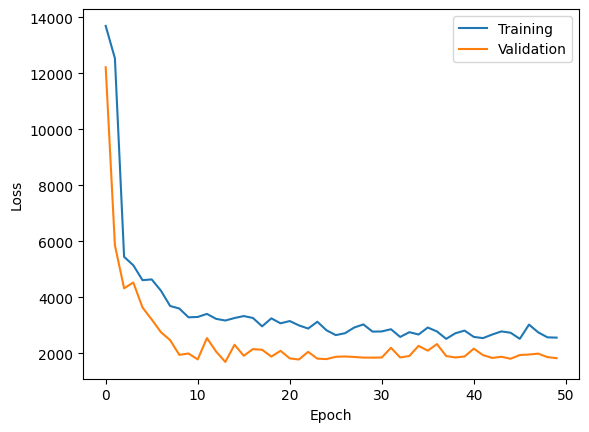

In [4]:
#------------------------------------------------------------------------------
#NERS 590: Applied Machine Learning for Nuclear Engineers
#In-class sript: Feedforward NN fitted with TF/Keras for car price prediction
#Date: 8/10/2024
#Author: Majdi I. Radaideh
#-----------------------------------------------------------------------------
# this script fits a simple FNN using Keras/TF for car price dataset
# note that the FNN hyperparameters are not tuned or optimized, so the results
#may not be good

#--------------------------------
# Import libraries
#---------------------------------
#Basic packages
import numpy as np
import pandas as pd # Dataframes
import matplotlib.pyplot as plt # plotting
import os
#Basic sklearns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
#Keras Specials
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
#--------------------------
# Data loading & Processing
#--------------------------
url='https://raw.githubusercontent.com/MajdiRadaideh/S097data/main/cars.csv'
data=pd.read_csv(url)
data=data.dropna()
print(data.head())
print(data.columns)
npdata=data.values
X=npdata[:,0:8]
Y=npdata[:,-1]
print(X.shape)
print(Y.shape)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=1)
xscaler = MinMaxScaler()
Xtrain=xscaler.fit_transform(Xtrain)
Xtest=xscaler.transform(Xtest)

#--------------------------
# Model Builder
#--------------------------
num_dens_layers=6                      #including the input/first layer
n_nodes=[50, 100, 200, 200, 200, 200]  #node per layer
learning_rate=5e-4
model = Sequential()
model.add(Input(shape=(Xtrain.shape[1],)))
model.add(Dense(n_nodes[0], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
for i in range(1,num_dens_layers):
    model.add(Dense(n_nodes[i], kernel_initializer='normal',activation='relu')) #Last layer (use linear activation and set nodes to number of Y columns/labels/outputs
model.add(Dense(1, kernel_initializer='normal',activation='linear'))
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate), metrics=['mean_absolute_error'])
model.summary()

#------------------------------------------------------
# Training
#-----------------------------------------------------
checkpoint = ModelCheckpoint('mymodel.keras', monitor='val_mean_absolute_error', save_best_only=True, mode='min', verbose=1)
history=model.fit(Xtrain, Ytrain, epochs=50, batch_size=4, validation_split = 0.1, callbacks=[checkpoint], verbose=True)

#-------------------------------------------------------
#plot the training/validation mean absolute error
#-------------------------------------------------------
train_err=history.history['mean_absolute_error']
val_err=history.history['val_mean_absolute_error']
plt.figure()
plt.plot(train_err, label='Training')
plt.plot(val_err, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
Ynn=model.predict(Xtest)
mae=mean_absolute_error(Ytest,Ynn)
rmse=np.sqrt(mean_squared_error(Ytest,Ynn))
r2=r2_score(Ytest,Ynn)
print('MAE=',mae, 'RMSE=',rmse, 'R2=', r2) #to show your model, just list the files in your path, and confirm mymodel.pkl exists
print('----List my temporary directory---')
os.listdir()